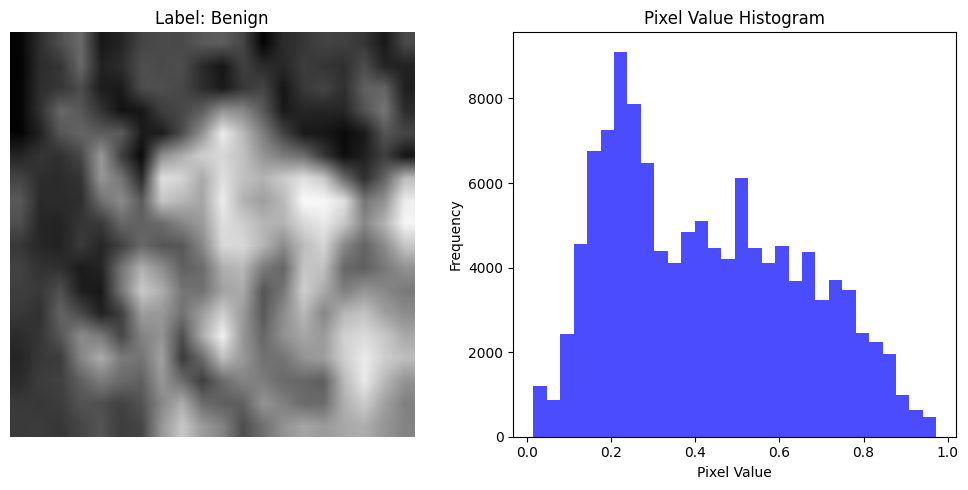

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the image transformations for training (augmentation + normalization)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),  # Rotation in degrees
    transforms.RandomResizedCrop((200, 200)),  # Random crop to 200x200
    transforms.ColorJitter(contrast=0.1, brightness=0.1, saturation=0.1),  # Random contrast, brightness, and saturation
    transforms.RandomGrayscale(p=0.1),  # Apply grayscale with a probability of 10%
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load the dataset
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image

# Function to plot image and its pixel value histogram
def plot_image_and_histogram(dataloader):
    class_names = dataloader.dataset.classes
    images, labels = next(iter(dataloader))  # Get a single image and its label
    image = images[0]  # Extract the image from the batch
    label = labels[0].item()  # Get the label
    image = image.permute(1, 2, 0)  # Rearrange dimensions to [height, width, channels]

    # Reverse normalization (from [-1, 1] to [0, 1])
    image = image * 0.5 + 0.5

    # Convert image to numpy array for plotting
    image_np = image.numpy()

    # Plot the image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f'Label: {class_names[label]}')
    plt.axis('off')

    # Plot the histogram of pixel values
    plt.subplot(1, 2, 2)
    pixel_values = image_np.flatten()

    plt.hist(pixel_values, bins=30, color='blue', alpha=0.7)
    plt.title('Pixel Value Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function to display the image and its histogram
plot_image_and_histogram(train_loader)


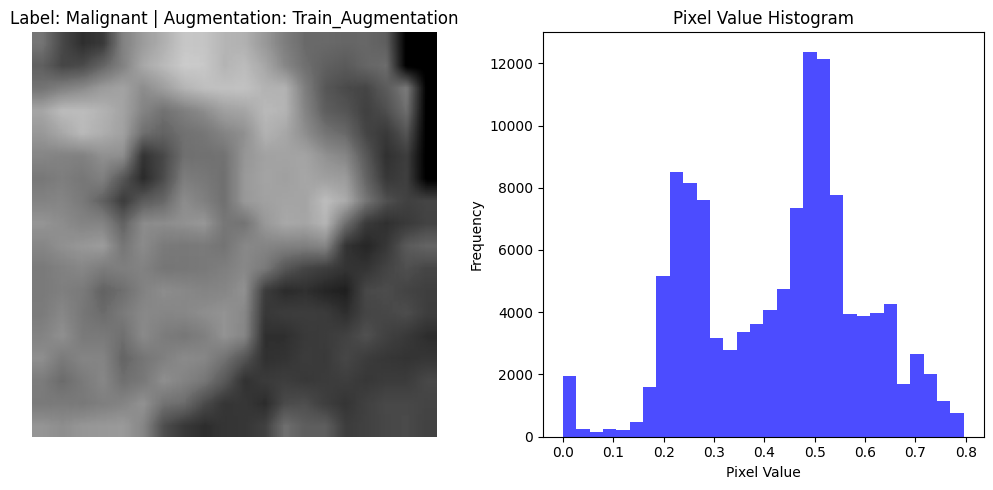

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the image transformations for training (augmentation + normalization)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),  # Rotation in degrees
    transforms.RandomResizedCrop((200, 200)),  # Random crop to 200x200
    transforms.ColorJitter(contrast=0.1, brightness=0.1, saturation=0.1),  # Random contrast, brightness, and saturation
    transforms.RandomGrayscale(p=0.1),  # Apply grayscale with a probability of 10%
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

test_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Custom Dataset class to handle augmentations
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None, train=True):
        self.dataset = dataset
        self.transform = transform
        self.train = train  # To distinguish between training and testing

    def __getitem__(self, index):
        image, target = self.dataset[index]

        if self.train:
            if self.transform:
                image = self.transform(image)
            aug_label = "Train_Augmentation"
        else:
            if self.transform:
                image = test_transform(image)
            aug_label = "Test/Val_Augmentation"

        return image, target, aug_label  # Return image, label, and augmentation type

    def __len__(self):
        return len(self.dataset)

# Load the dataset
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=None)
custom_train_dataset = CustomImageDataset(train_dataset, transform=train_transform, train=True)
train_loader = DataLoader(custom_train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image

# Function to plot image and its pixel value histogram
def plot_image_and_histogram(dataloader):
    class_names = dataloader.dataset.dataset.classes
    images, labels, aug_labels = next(iter(dataloader))  # Get a single image and its label
    image = images[0]  # Extract the image from the batch
    label = labels[0].item()  # Get the label
    aug_label = aug_labels[0]  # Get the augmentation type label

    image = image.permute(1, 2, 0)  # Rearrange dimensions to [height, width, channels]

    # Reverse normalization (from [-1, 1] to [0, 1])
    image = image * 0.5 + 0.5

    # Convert image to numpy array for plotting
    image_np = image.numpy()

    # Plot the image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f'Label: {class_names[label]} | Augmentation: {aug_label}')
    plt.axis('off')

    # Plot the histogram of pixel values
    plt.subplot(1, 2, 2)
    pixel_values = image_np.flatten()

    plt.hist(pixel_values, bins=30, color='blue', alpha=0.7)
    plt.title('Pixel Value Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function to display the image and its histogram
plot_image_and_histogram(train_loader)


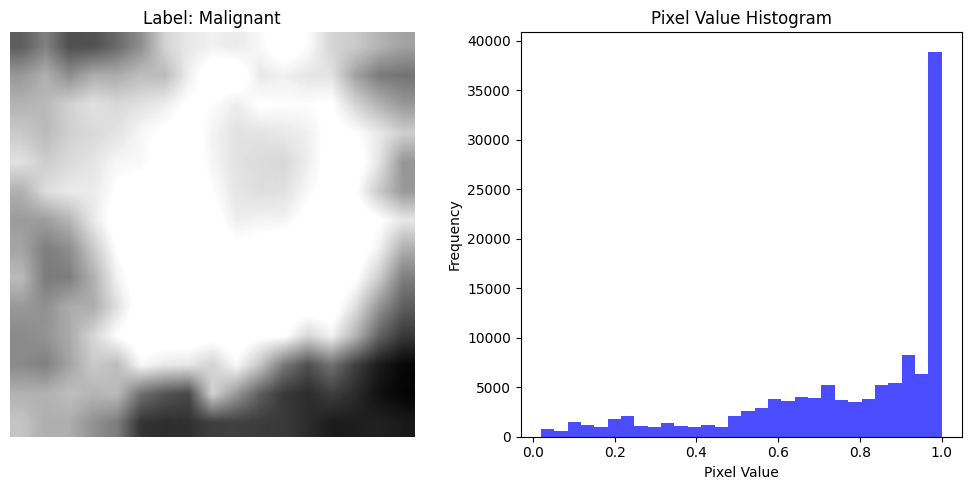

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the image transformations for training (augmentation + normalization)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),  # Rotation in degrees
    transforms.RandomResizedCrop((200, 200)),  # Random crop to 200x200
    transforms.ColorJitter(contrast=0.1, brightness=0.1, saturation=0.1),  # Random contrast, brightness, and saturation
    transforms.RandomGrayscale(p=0.1),  # Apply grayscale with a probability of 10%
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load the dataset
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image

# Function to plot image and its pixel value histogram
def plot_image_and_histogram(dataloader):
    class_names = dataloader.dataset.classes
    images, labels = next(iter(dataloader))  # Get a single image and its label
    image = images[0]  # Extract the image from the batch
    label = labels[0].item()  # Get the label
    image = image.permute(1, 2, 0)  # Rearrange dimensions to [height, width, channels]

    # Reverse normalization (from [-1, 1] to [0, 1])
    image = image * 0.5 + 0.5

    # Convert image to numpy array for plotting
    image_np = image.numpy()

    # Plot the image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title(f'Label: {class_names[label]}')
    plt.axis('off')

    # Plot the histogram of pixel values
    plt.subplot(1, 2, 2)
    pixel_values = image_np.flatten()

    plt.hist(pixel_values, bins=30, color='blue', alpha=0.7)
    plt.title('Pixel Value Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function to display the image and its histogram
plot_image_and_histogram(train_loader)


In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2  # OpenCV for corner detection
from skimage.feature import hog  # For HOG feature extraction

# Load the dataset (for demonstration, replace with your image directory)
train_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load your dataset here
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image

# Function to apply Sobel edge detection
def sobel_edge_detection(image):
    # Define Sobel filters
    sobel_x = torch.tensor([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 3, 3]

    sobel_y = torch.tensor([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 3, 3]

    # Apply the filters to the image
    edge_x = F.conv2d(image, sobel_x, padding=1)
    edge_y = F.conv2d(image, sobel_y, padding=1)

    # Combine the two edges
    edges = torch.sqrt(edge_x**2 + edge_y**2)
    return edges

# Function for Harris corner detection
def harris_corner_detection(image):
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 255).astype(np.uint8)  # Convert back to uint8 for OpenCV

    # Convert to grayscale if it's not
    if image_np.shape[0] == 3:
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)

    # Harris corner detection
    corners = cv2.cornerHarris(image_np, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)  # Dilate to mark the corners
    return corners

# Function for Histogram of Oriented Gradients (HOG)
def compute_hog(image):
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 255).astype(np.uint8)  # Convert back to uint8

    # Convert to grayscale if it's not
    if image_np.shape[0] == 3:
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)

    hog_features, hog_image = hog(image_np, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    return hog_features, hog_image

# Function to plot images
def plot_images(original_image, edges, corners, hog_image):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(original_image.permute(1, 2, 0) * 0.5 + 0.5)  # Reverse normalization
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(edges.squeeze().detach().numpy(), cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(corners, cmap='hot')
    plt.title('Harris Corners')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a single image from the dataset
images, labels = next(iter(train_loader))
image = images[0]

# Apply the edge detection, corner detection, and HOG computation
edges = sobel_edge_detection(image)
corners = harris_corner_detection(image)
hog_features, hog_image = compute_hog(image)

# Plot the results
plot_images(image, edges, corners, hog_image)


RuntimeError: Given groups=1, weight of size [1, 1, 3, 3], expected input[1, 3, 200, 200] to have 1 channels, but got 3 channels instead

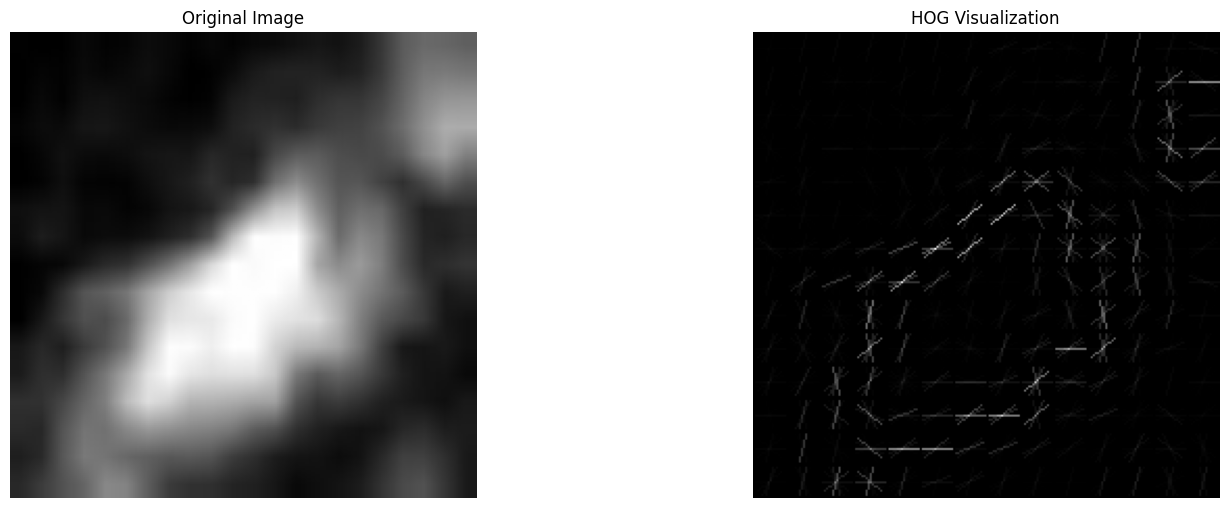

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2  # OpenCV for corner detection
from skimage.feature import hog  # For HOG feature extraction

# Load the dataset (for demonstration, replace with your image directory)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load your dataset here
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image


def compute_hog(image):
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 224).astype(np.uint8)  # Convert back to uint8

    # Convert to grayscale if it's not
    if image_np.shape[0] == 3:
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)

    hog_features, hog_image = hog(image_np, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    return hog_features, hog_image

# Function to plot images
def plot_images(original_image,hog_image):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(original_image.permute(1, 2, 0) * 0.5 + 0.5)  # Reverse normalization
    plt.title('Original Image')
    plt.axis('off')


    plt.subplot(2, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a single image from the dataset
images, labels = next(iter(train_loader))
image = images[0]

# Apply the edge detection, corner detection, and HOG computation

hog_features, hog_image = compute_hog(image)

# Plot the results
plot_images(image,hog_image)


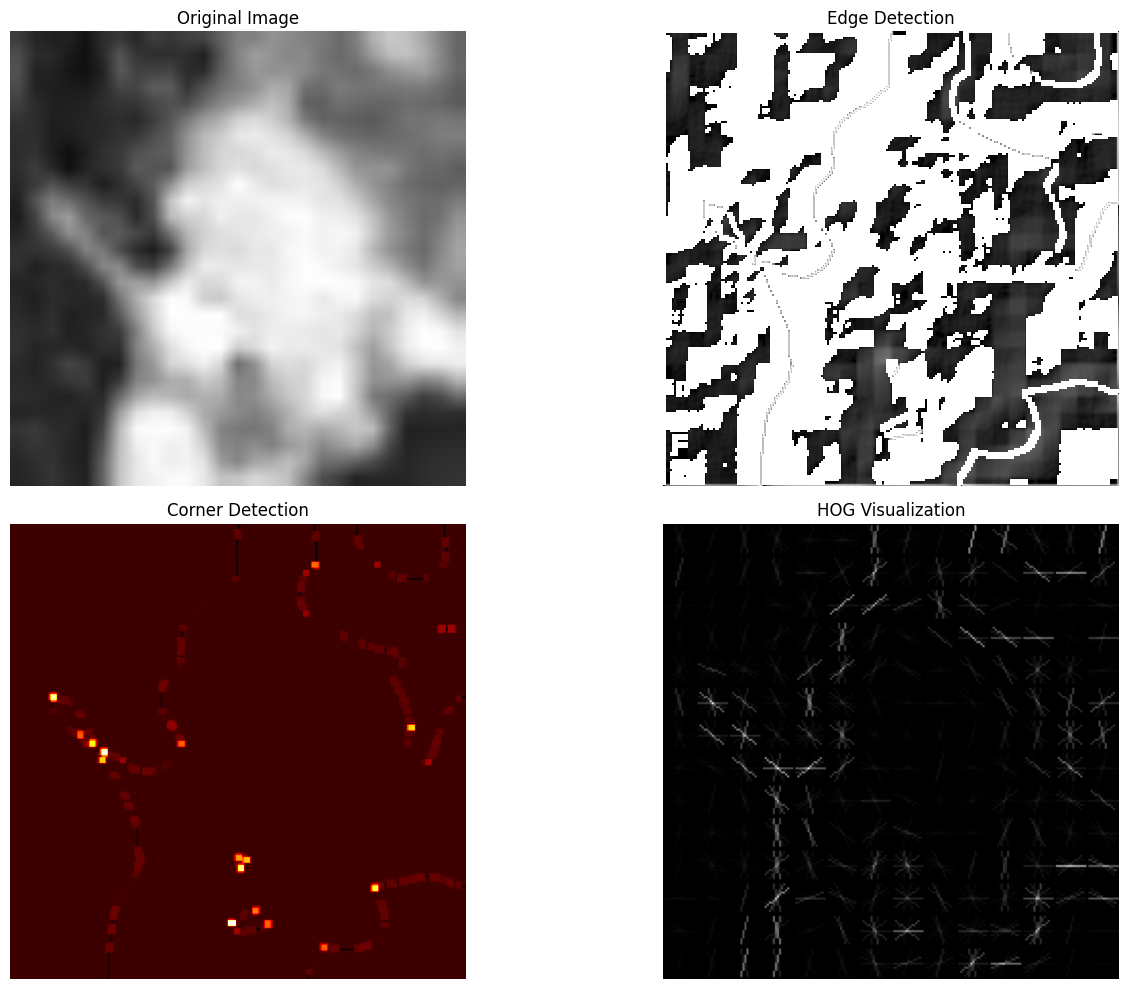

In [1]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2  # OpenCV for corner detection
from skimage.feature import hog  # For HOG feature extraction

# Load the dataset (for demonstration, replace with your image directory)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

# Load your dataset here
train_dataset = ImageFolder('/content/drive/MyDrive/clasification-roi/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Set batch_size=1 to get a single image

# Function to apply Sobel edge detection
def sobel_edge_detection(image):
    # Convert to grayscale
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 224).astype(np.uint8)  # Convert back to uint8

    if image_np.shape[0] == 3:  # Check if it's RGB
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)

    image_gray = torch.tensor(image_np, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Convert to tensor with shape [1, 1, H, W]

    # Define Sobel filters
    x = torch.tensor([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 3, 3]

    y = torch.tensor([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 3, 3]

    # Apply the filters to the grayscale image
    edge_x = F.conv2d(image_gray, x, padding=1)
    edge_y = F.conv2d(image_gray, y, padding=1)

    # Combine the two edges
    edges = torch.sqrt(edge_x*2 + edge_y*2)
    return edges

# Function for Harris corner detection
def corner_detection(image):
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 224).astype(np.uint8)  # Convert back to uint8 for OpenCV

    # Convert to grayscale if it's not
    if image_np.shape[0] == 3:
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)


    corners = cv2.cornerHarris(image_np, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)  # Dilate to mark the corners
    return corners

# Function for Histogram of Oriented Gradients (HOG)
def compute_hog(image):
    image_np = image.squeeze().detach().numpy()  # Convert tensor to numpy array
    image_np = (image_np * 255).astype(np.uint8)  # Convert back to uint8

    # Convert to grayscale if it's not
    if image_np.shape[0] == 3:
        image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)

    hog_features, hog_image = hog(image_np, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    return hog_features, hog_image

# Function to plot images
def plot_images(original_image, edges, corners, hog_image):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(original_image.permute(1, 2, 0) * 0.5 + 0.5)  # Reverse normalization
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(edges.squeeze().detach().numpy(), cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(corners, cmap='hot')
    plt.title('Corner Detection')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a single image from the dataset
images, labels = next(iter(train_loader))
image = images[0]

# Apply the edge detection, corner detection, and HOG computation
edges = sobel_edge_detection(image)
corners = corner_detection(image)
hog_features, hog_image = compute_hog(image)

# Plot the results
plot_images(image, edges, corners, hog_image)




In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to perform Harris Corner Detection
def harris_corner_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to float32 for Harris corner detection
    gray = np.float32(gray)

    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate corner points to enhance visibility
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, it may vary depending on the image
    image[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark the corners in red

    return image

# Function to process all images in a dataset folder
def process_dataset(folder_path):
    # List all files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Loop over each image file
    for img_file in image_files:
        image_path = os.path.join(folder_path, img_file)

        # Perform Harris corner detection
        corner_image = harris_corner_detection(image_path)

        # Display the image with corners detected
        plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Corners detected in {img_file}')
        plt.axis('off')
        plt.show()

# Set the path to your dataset folder
folder_path = "/content/drive/MyDrive/clasification-roi"

# Process the dataset
process_dataset(folder_path)


In [ ]:
import numpy as np
image=np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

kernel=np.array([
    [1,0],
    [0,-1]
])
feature_map=np.array([
    [-4,-4],
    [-4,-4]
])
Sobel_x_operator=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
def convolve(image,kernel):
  image_x,image_y=image.shape
  kernel_x,kernel_y=kernel.shape
  #kernel radius
  height_radius,width_radius=np.array(kernel.shape)//2
  print(height_radius)
  print(width_radius)
  output=np.zeros(image.shape)
convolve(image,kernel)

1
1
